<a href="https://colab.research.google.com/github/JuanFaria02/7-Day-Of-Code/blob/master/Gastos_senadores(dia_1_e_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gastos dos Senadores (2016-2020)

##Introdução
---
Os gastos dos senadores são muitas vezes usadas indevidamente e de forma exorbitante, por conta dessas questões é de extrema importância análisar os dados desses gastos e tirar conclusões deles afim de apresentar a população geral como e quanto é gasto. 

#**ANALISANDO OS DADOS**


---
Limpeza e estruturação dos dados 

O primeiro passo é importar as bibliotecas que serão usadas

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Depois leremos todos os dados para utilizar seus reespectivos dataframes do ano de 2014 até 2019

In [115]:
'''df_2014 = pd.read_csv('/content/drive/MyDrive/Projetos /Gastos Senadores Brasileiros/Arquivo dados/despesa_ceaps_2014.csv', delimiter = ";", header=1, encoding="ISO-8859-1")
df_2014 = pd.DataFrame(df_2014)
'''
df_2015 = pd.read_csv('/content/drive/MyDrive/Projetos /Gastos Senadores Brasileiros/Arquivo dados/despesa_ceaps_2015.csv', delimiter = ";", header=1, encoding="ISO-8859-1")
df_2015 = pd.DataFrame(df_2015)

df_2016 = pd.read_csv('/content/drive/MyDrive/Projetos /Gastos Senadores Brasileiros/Arquivo dados/despesa_ceaps_2016.csv', delimiter = ";", header=1, encoding="ISO-8859-1")
df_2016 = pd.DataFrame(df_2016)

df_2017 = pd.read_csv('/content/drive/MyDrive/Projetos /Gastos Senadores Brasileiros/Arquivo dados/despesa_ceaps_2017.csv', delimiter = ";", header=1, encoding="ISO-8859-1")
df_2017 = pd.DataFrame(df_2017)

df_2018 = pd.read_csv('/content/drive/MyDrive/Projetos /Gastos Senadores Brasileiros/Arquivo dados/despesa_ceaps_2018.csv', delimiter = ";", header=1, encoding="ISO-8859-1")
df_2018 = pd.DataFrame(df_2018)

df_2019 = pd.read_csv('/content/drive/MyDrive/Projetos /Gastos Senadores Brasileiros/Arquivo dados/despesa_ceaps_2019.csv', delimiter = ";", header=1, encoding="ISO-8859-1")
df_2019 = pd.DataFrame(df_2019)

df_2020 = pd.read_csv('/content/drive/MyDrive/Projetos /Gastos Senadores Brasileiros/Arquivo dados/despesa_ceaps_2020.csv', delimiter = ";", header=1, encoding="ISO-8859-1")
df_2020 = pd.DataFrame(df_2020)


#para ver valor vazio: ou o df_2018.info ou o df_2018.isna().any() ou sum()
#print(df_2018.info())

lista_df = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]


Os números não aparecem como nulos devido estarem como string. Portanto, para tratar esses dados é preciso converter as strings para numéricos, devido a parte decimal dos números estarem separadas por "," foi preciso transformar a "," em "." e depois converte-los. 

In [116]:
for k in lista_df:
  for i in k['VALOR_REEMBOLSADO']:
    for s in i:
      if s == ',':
        i = i.replace(s, '.')
  

In [117]:
#Existem valores vazios que não aparecem como vazio pois é um número
for i in range(len(lista_df)):
  lista_df[i]['VALOR_REEMBOLSADO'] = pd.to_numeric(lista_df[i]['VALOR_REEMBOLSADO'], errors="coerce")
  lista_df[i]['VALOR_REEMBOLSADO'] = np.round(lista_df[i]['VALOR_REEMBOLSADO'], decimals = 2, out=None)



Verificar se ainda existem informações nulas e se existirem quantas são

In [118]:
ano = 2016
for i in lista_df:
  print(f'Ano: {ano}')
  print(i.info())
  ano += 1
  print()

Ano: 2016
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26056 entries, 0 to 26055
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                26056 non-null  int64  
 1   MES                26056 non-null  int64  
 2   SENADOR            26056 non-null  object 
 3   TIPO_DESPESA       26056 non-null  object 
 4   CNPJ_CPF           26056 non-null  object 
 5   FORNECEDOR         26056 non-null  object 
 6   DOCUMENTO          21850 non-null  object 
 7   DATA               26056 non-null  object 
 8   DETALHAMENTO       22003 non-null  object 
 9   VALOR_REEMBOLSADO  8614 non-null   float64
 10  COD_DOCUMENTO      26054 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.2+ MB
None

Ano: 2017
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------           

Após verificar foi transformado os valores nulos nos campos que não seram usados para cálculos matemáticos em Strings indicando que a informação não foi preenchida.

In [119]:
#Substituir String

for i in lista_df:

  i["MES"] = i["MES"].replace(np.nan, "Informação Não preenchida")
  i["TIPO_DESPESA"] = i["TIPO_DESPESA"].replace(np.nan, "Informação Não preenchida")
  i["CNPJ_CPF"] = i["CNPJ_CPF"].replace(np.nan, "Informação Não preenchida")
  i["FORNECEDOR"] = i["FORNECEDOR"].replace(np.nan, "Informação Não preenchida")
  i["DOCUMENTO"] = i["DOCUMENTO"].replace(np.nan, "Informação Não preenchida")
  i["DATA"] = i["DATA"].replace(np.nan, "Informação Não preenchida")
  i["DETALHAMENTO"] = i["DETALHAMENTO"].replace(np.nan, "Informação Não preenchida")
  i["COD_DOCUMENTO"] = i["COD_DOCUMENTO"].replace(np.nan, "Informação Não preenchida")


Para finalizar o tratamento dos dados, foi utilizado a interpolação para preencher os valores NaN no campo de Valor Reembolsado e foi removido as colunas que não serão utilizadas

In [120]:
#Devido a um número alto de NaN eu decide por substituilos pela média de cada senador
for i in lista_df:
  i["VALOR_REEMBOLSADO"] = i["VALOR_REEMBOLSADO"].interpolate() #ffill preenche com o anterior e bfill com o posterior
  #display(i)
  #print()



for j in range(len(lista_df)):
  lista_df[j] = lista_df[j].dropna(how="any", axis=0) #Removendo alguns dados que não receberam valores e continuam NaN (são poucos portanto não atrapalha a análise)
  lista_df[j] = lista_df[j].drop(columns= ["TIPO_DESPESA", "FORNECEDOR", "DOCUMENTO", "COD_DOCUMENTO"])


Ao separar e tratar os dados surgem perguntas que serão respondidas pelos mesmos. Nesse projeto serão respondidas as perguntas: 



*   Os gastos dos senadores aumentaram ou diminuiram durante os anos?
*   No ano de 2020, durante a pandemia, os gastos sofreram mudanças drásticas?






#**Gastos durante os anos**

Entender como os gastos se apresentam ao passar dos anos é importante para surgir novas perguntas e correlacionado a essas perguntas surgem respostas, dessa forma surgiu a [iniciativa Operação Serenata de Amor](https://serenata.ai/?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+1%2F7%3A+Data+Cleaning+and+Preparation&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+1%2F7%3A+Consumir+uma+API+de+filmes), que aplica Inteligência Artificial para analisar gastos de deputados brasileiros, e que já foi capaz de identificar vários usos indevidos do dinheiro público.

,Ano,Média Reembolso
0,2015,2877.189376
1,2016,1887.328103
2,2017,1881.093624
3,2018,2007.104483
4,2019,2114.562546
5,2020,2482.279316


Text(0.5, 0, 'Anos')

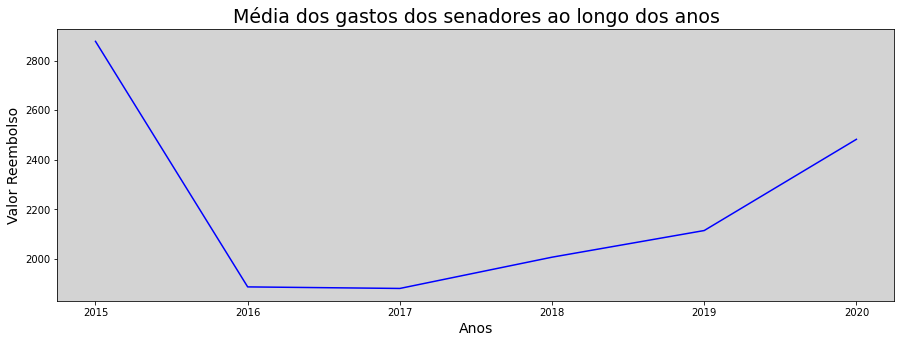

In [145]:
dicionario_media = {}
for i in lista_df:
  string_chave = str(i.ANO.unique())
  reembolso_df = i['VALOR_REEMBOLSADO'].mean()
  dicionario_media[string_chave[1:5]] = reembolso_df


figura = plt.figure(figsize=(15,5))
df_dict = pd.DataFrame(list(dicionario_media.items()), columns=['Ano', 'Média Reembolso'])
display(df_dict)
ax = sns.lineplot(x = df_dict['Ano'], y = df_dict['Média Reembolso'], color='blue')
ax.set_facecolor('#d3d3d3')
plt.title('Média dos gastos dos senadores ao longo dos anos', fontsize=19)
plt.ylabel('Valor Reembolso',fontsize=14)
plt.xlabel('Anos', fontsize=14)

Como foi apresentado, a média de gasto dos senadores aumentaram consideravelmente, principalmente de 2017 à 2020 com um crescimento de aproximadamente 32%. O crescimento tão grande desses gastos podem ser relacionados ao aumento da inflação, segundo o G1 a inflação fecha 2020 com maior alta desde 2016, 2015 também possui um elevado gasto por parte dos senadores e o país possuia o IPCA (Inflação anual) de 10,67%, esse elevado gasto foi o maior entre 2015 e 2020. Apesar da variação inflação de 2020 ser menor do que outros anos ela possui altas exorbitantes em determinados meses como dezembro que foi a maior alta desde 2003. 

O gráfico de gastos, com exceção de 2016, acompanhou a subida da inflação como apresentado nessa imagem. Portanto, esse pensamento do aumento ser devido a ela não pode ser descartado.

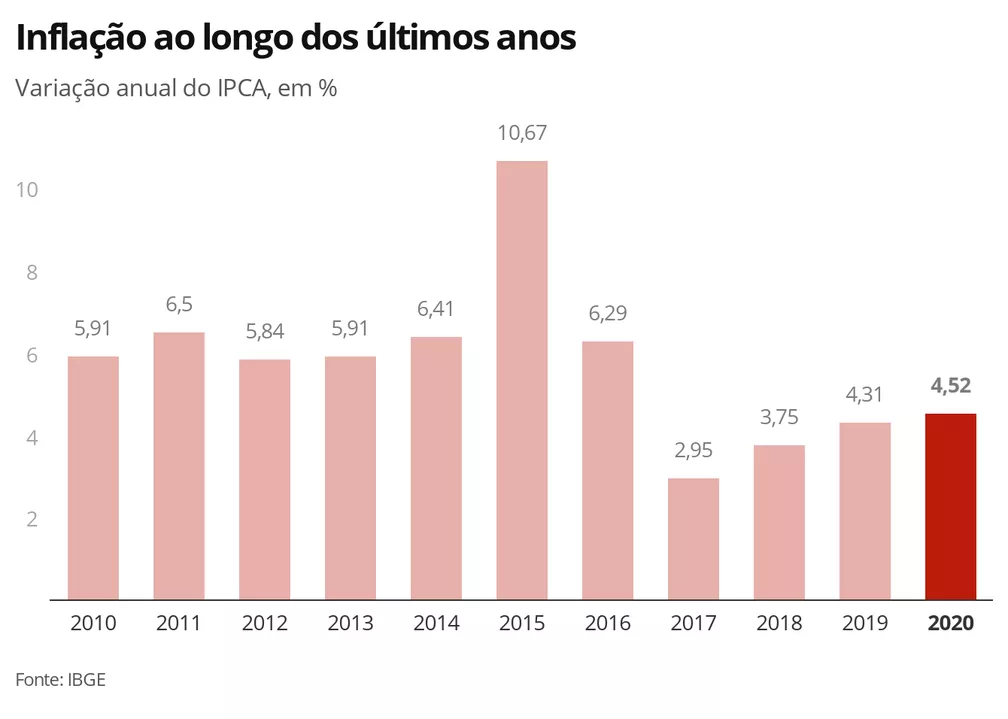


([Link do G1](https://g1.globo.com/economia/noticia/2021/01/12/ipca-inflacao-oficial-fecha-2020-em-452percent.ghtml)). 

#**Ocorreu aumento drástico na Pandemia?**

Analisando o gráfico do momento em que ele cresce a partir do ano de 2017, podemos observar o aumento de 6,70% de gastos no ano de 2018 comparado a 2017, em 2019 não houve aumento em relação a 2018 no entanto o aumento de 2020 em relação a 2019 é de 17,39%. Portanto, podemos concluir que ocorreu um aumento maior nos gastos no ano em que houve a pandemia de covid-19. 

,Ano,Média Reembolso,Variação
0,2015,2877.189376,NaN
1,2016,1887.328103,-34.403758
2,2017,1881.093624,-0.330334
3,2018,2007.104483,6.698808
4,2019,2114.562546,5.353885
5,2020,2482.279316,17.389732


----------------------------------------------------------------------------------------------------------------------------------------------------------------


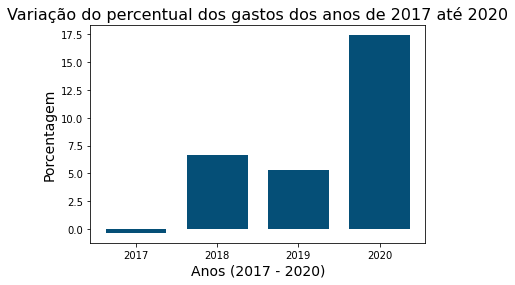

In [183]:
variacao = df_dict['Média Reembolso'].pct_change()

variacao_lista = list(variacao)
variacao_desejada = [i * 100 for i in variacao_lista[2:]]
ano_desejado = df_dict[2:]['Ano']
df_dict['Variação'] = variacao * 100
display(df_dict)

print("----"*40)
plt.bar(ano_desejado, variacao_desejada, width=0.75, color='#054f77')
plt.title('Variação do percentual dos gastos dos anos de 2017 até 2020', fontsize=16)

plt.ylabel('Porcentagem', fontsize=14)
plt.xlabel('Anos (2017 - 2020)', fontsize=14)

plt.show()


O gráfico acima apresenta bem os dados mencionados e a variação percentual dos gastos. 

#Conclusão


---

Estudar temas como os gastos dos senadores nos ajuda a ficar cientes de como o dinheiro está sendo gasto e se houver uma tendência de aumento quais os motivos a serem considerados. Analisar o aumento ou a diminuição é muito diferente de entender se os gastos estão sendo feitos de maneira honesta ou se existem gastos feito de maneira irregular, para esse fim deve ser feito uma análise mais minuciosa como a ***iniciativa Operação Serenata de Amor***, porém a que foi feita aqui têm apenas caráter educativo sendo utilizado para testar e treinar meus conhecimentos em análise de dados. Por trás do tema, existe um grande número de ciêntistas que estudam ele mais a fundo.





#Conclusão dos dados

---



*   Os gastos dos senadores aumentaram ao longo dos anos, o aumento de um ano em relação ao outro acompanhou a variação do IPCA ao longo dos últimos anos
*   A pandêmia aumentou os gastos de forma considerável sendo o ano com a maior taxa de variação percentual desde 2017.   




